# Model 1b - Horizontal stratigraphic gridded

This is the most simpel model of horizontally stacked layers and we will use a bunch of subgrids. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
#sys.path.append("../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [2]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/data/input_data/jan_models/model1_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model1_surface_points.csv") 

Active grids: ['regular']


Setting and ordering the units and series:

In [3]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock2,Strat_Series,1,False,#015482,1
1,rock1,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


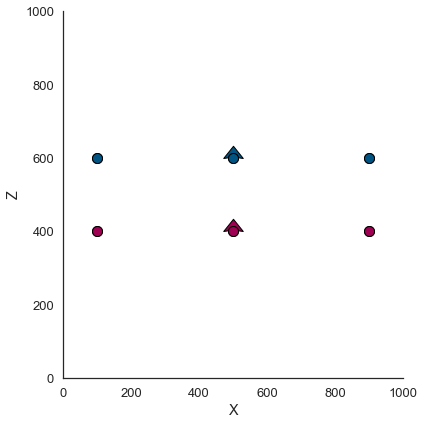

In [4]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [5]:
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_run')

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


/Users/andrew/anaconda3/envs/gempy3/lib/python3.7/site-packages/theano/gof/cc.py:968: UserWarning: Your g++ compiler fails to compile OpenMP code. We know this happen with some version of the EPD mingw compiler and LLVM compiler on Mac OS X. We disable openmp everywhere in Theano. To remove this warning set the theano flags `openmp` to False.
  ret += x.c_compile_args()


First create a combined grid of the total size we want to compute, and create the solution object

In [6]:
combined_grid = gp.core.data.Grid()
combined_regular_grid = combined_grid.set_regular_grid(extent=[0, 1000, 0, 1000, 0, 1000], resolution=[100,100,100])
combined_solution = gp.core.model.Solution(grid=combined_grid, surfaces=geo_data.surfaces, series=geo_data.series)

Next, create the sub-grid objects, here we are asking for 2 divisons on the X, Y, Z axes.
This should result in 8 sub-grids extents and resolutions.

In [7]:
grids = gp.grid_types.define_subgrid_parameters(combined_grid, 2, 2, 2)

In [8]:
# should be 8
print(len(grids))
print(grids[0])

8
([0.0, 500.0, 0.0, 500.0, 0.0, 500.0], [50, 50, 50])


We now have a list of the extents and resolutions of the sub grids.
Now compute the model, ie do the 'fit'. 

In [9]:
gp.compute_model(geo_data, set_solutions=False, compute_mesh=False) 

[array([[3. , 3. , 3. , ..., 2.5, 2.5, 2.5]]),
 array([[[3. , 3. , 3. , ..., 2.5, 2.5, 2.5]]]),
 array([-8.41082564e-21, -2.83078639e-22,  2.21803385e-21, -1.64720997e-20,
        -6.92823608e-22, -4.63131647e-22, -1.09375087e-20, -1.60558875e-20,
         7.52766533e-20, -9.65470265e-21, -1.54362860e-20,  2.38839349e-20,
         1.26225423e-20, -7.83942694e-20, -9.55642672e-22, -1.53673689e-20,
        -4.16384676e-18, -2.44959093e-18,  1.00000000e+00]),
 array([[0.3877, 0.4127, 0.4377, ..., 0.8752, 0.8752, 0.8752]]),
 array([[1.1252, 0.8752]]),
 array([[ True,  True,  True, ...,  True,  True,  True]])]

now that we have computed the model we can now 'evaluate' the model at our sub-grids

In [10]:
sub_grids_and_solutions = []
for extent, res in grids:
    grid = gp.core.data.Grid()
    grid.set_regular_grid(extent=extent, resolution=res)
    geo_data.set_regular_grid(extent, res)
    sol = gp.compute_model(geo_data, output='geology', compute_mesh=False, set_solutions=False, 
                           reset_scalar=False, reset_block=False, reset_weights=False)
    sub_grids_and_solutions.append((grid,sol))

Active grids: ['regular']
Active grids: ['regular']
Active grids: ['regular']
Active grids: ['regular']
Active grids: ['regular']
Active grids: ['regular']
Active grids: ['regular']
Active grids: ['regular']


In [11]:
x = gp.set_sub_grid_solutions_to_regular_grid(geo_data, combined_solution, combined_grid, sub_grids_and_solutions);

/Users/andrew/PycharmProjects/gempy/gempy/core/solution.py:260: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


In [12]:
geo_data.solutions.lith_block.shape

(1000000,)

Displaying the result in x and y direction:

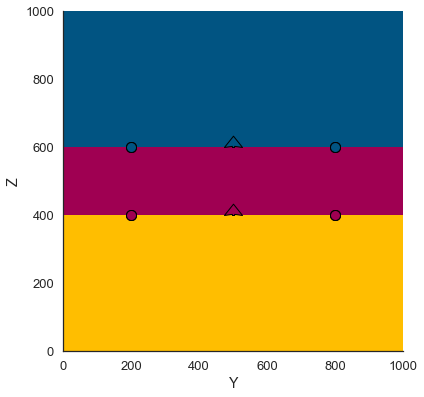

In [13]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=10,
                         direction='x', show_all_data=True)

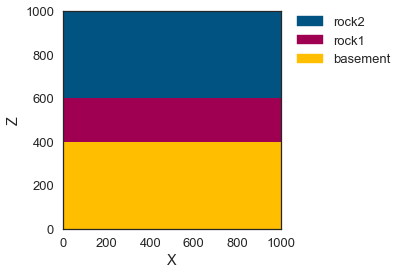

In [14]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=5,
                    direction='y', show_data=True)
